In [1]:
%matplotlib inline
import scipy.io
import random
from matplotlib import pyplot
import matplotlib
import seaborn
import numpy
import sys
import pandas
import os
from scipy import sparse
from c1extra import boxplot, read_remote_sheet, get_cluster_maps, ODFReader

10x: black, green, pink, red, dark red clusters

10x: mesprox, mus1, mus2, mus3, mus4


In [52]:
def read_subset(filename):
    results = []
    with open(filename, 'rt') as instream:
        for line in instream:
            results.append(line.rstrip())
    return results
    

In [54]:
tenx_cell_filter = read_subset('heatmap/NewIndex4.txt')

In [2]:
sheet = read_remote_sheet(
    "https://woldlab.caltech.edu/nextcloud/index.php/s/XNJQRJbWeXDyf78/download", 
    'genes_by_cluster')

cluster_maps = get_cluster_maps(sheet, '10x_class', 'abbreviations')
cluster_label = cluster_maps['label']
cluster_color = cluster_maps['color']
cluster_order = cluster_maps['order']

In [3]:
Mouse10Xdata_df=pandas.read_csv('heatmap/DianeMouse10X_df.csv', index_col=0)
MouseC1data_df=pandas.read_csv('heatmap/DianeMouseC1_df.csv', index_col=0)

In [4]:
Mouse10Xdata_df.head()

,Myod1,Id2,Ssrp1,Atf7,Mef2c,Purb,Ybx3,Foxo1,Csdc2,En1,...,Isl1,Cdip1,Myc,Nfyc,Prox1,Zfp568,Myf5,Tead4,Lrrfip1,louvain
index,,,,,,,,,,,,,,,,,,,,,
limb12_13_0AAACCTGAGATCGATA_1,-0.217882,-0.478983,1.500405,-0.374745,-0.36521,1.177301,-0.775829,-0.319910,-0.170951,-0.214007,...,-0.077787,-0.539298,-0.290273,-0.603955,-0.158549,-0.343866,-0.170971,-0.130652,-0.311799,3
limb12_13_0AAACCTGAGATGAGAG_1,-0.217882,-1.199543,0.350969,-0.374745,-0.36521,-0.752405,-0.775829,-0.319910,-0.170951,-0.214007,...,-0.077787,1.831324,-0.290273,1.614133,-0.158549,-0.343866,-0.170971,-0.130652,-0.311799,2
limb12_13_0AAACCTGAGCAGATCG_1,-0.217882,-0.291050,0.133826,-0.374745,-0.36521,1.592155,0.678134,-0.319910,-0.170951,-0.214007,...,-0.077787,2.580751,-0.290273,1.278573,-0.158549,-0.343866,-0.170971,-0.130652,-0.311799,5
limb12_13_0AAACCTGAGCGATCCC_1,-0.217882,0.291439,-0.297944,1.245311,-0.36521,0.866126,0.162798,3.793414,-0.170951,1.912058,...,-0.077787,-0.539298,-0.290273,-0.603955,-0.158549,-0.343866,-0.170971,-0.130652,1.741368,6
limb12_13_0AAACCTGAGTGTACCT_1,-0.217882,-1.199543,-1.084365,-0.374745,-0.36521,-0.752405,-0.775829,-0.319910,-0.170951,-0.214007,...,-0.077787,-0.539298,-0.290273,-0.603955,8.286293,-0.343866,-0.170971,-0.130652,-0.311799,1


In [5]:
barcodes_to_cluster = pandas.read_csv('monocle/mouse/barcodes-to-cluster.csv', index_col=0)

In [64]:
set(barcodes_to_cluster.loc[tenx_cell_filter]['orig.ident'])

{0, 4, 7, 12, 17}

In [67]:
tenx_clusters = barcodes_to_cluster.loc[tenx_cell_filter]
tenx_clusters.head()

,orig.ident
limb3_11_0ACGGGCTTCCGAACGC_1,0
limb3_11_0TAAGAGAAGCAGACTG_1,0
limb3_11_0GTAGGCCCAAGTCTAC_1,0
limb3_11_0CCTTCGACACATCCGG_1,0
limb4_12_0CTCGAAAGTCGACTGC_1,0


In [68]:
mesprox = list(tenx_clusters[tenx_clusters['orig.ident'] == 0].index)
mus1 = list(tenx_clusters[tenx_clusters['orig.ident'] == 7].index)
mus2 = list(tenx_clusters[tenx_clusters['orig.ident'] == 4].index)
mus3 = list(tenx_clusters[tenx_clusters['orig.ident'] == 17].index)
mus4 = list(tenx_clusters[tenx_clusters['orig.ident'] == 12].index)
tenx_filtered_clusters = mesprox + mus1 + mus2 + mus3 + mus4

In [69]:
cluster_names = Mouse10Xdata_df['louvain'].map(lambda x: cluster_label[x])
genes = list(set(Mouse10Xdata_df.columns).difference(['louvain']))
adata_for_plotting = Mouse10Xdata_df.loc[tenx_filtered_clusters, genes]
louvain_col_colors=cluster_names.map(lambda x: cluster_color[x])
#adata_for_plotting = Mouse10Xdata_df.loc[
#    NewIndex3,
#    Mouse10Xdata_df.columns.isin(ConfusedMarkers)]
#adata_for_plotting = adata_for_plotting.reindex(columns=ConfusedMarkers)

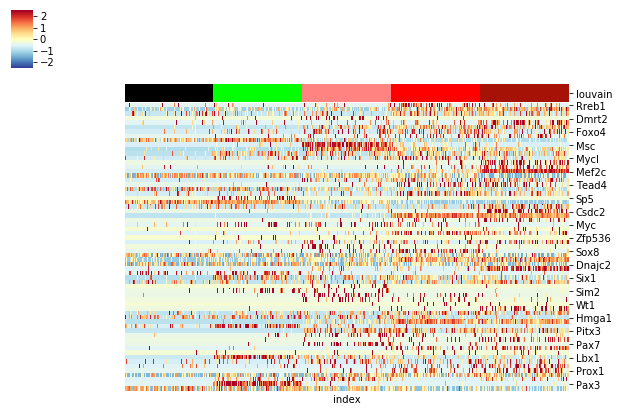

In [73]:
cg1_0point2=seaborn.clustermap(
    adata_for_plotting.transpose(),
    metric="correlation",
    cmap='RdYlBu_r',
    row_cluster=False,col_cluster=False,robust=True,xticklabels=False,figsize=(10,7),
    z_score=0,
    vmin=-2.5,vmax=2.5,
    col_colors=louvain_col_colors,
    #,standard_scale=0
)


###If you want to plot absolute level you can just drop z_score=0, vmin=-2.5,vmax=2.5

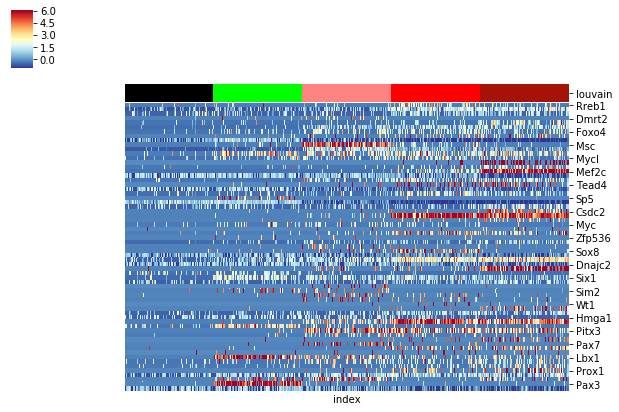

In [75]:
cg1_0point2=seaborn.clustermap(
    adata_for_plotting.transpose(),
    metric="correlation",
    cmap='RdYlBu_r',
    row_cluster=False,col_cluster=False,robust=True,xticklabels=False,figsize=(10,7),
    #z_score=0,
    #vmin=-2.5,vmax=2.5,
    col_colors=louvain_col_colors,
    #,standard_scale=0
)


###If you want to plot absolute level you can just drop z_score=0, vmin=-2.5,vmax=2.5

In [25]:
cluster_color

{'mus4': '#A71206',
 'mus3': '#ff0000',
 'mus2': '#FF8380',
 'mus1': '#00FF00',
 'mesprox': '#000000',
 'mesdist': '#C0C0C0',
 'mesX': '#995432',
 'chon': '#00FFFF',
 'chon Ihh': '#016edb',
 'ost': '#483F84',
 'EMP': '#FBC83C',
 'mac': '#FFFA2C',
 'meg': '#FF9A21',
 'endo': '#C39CFB',
 'pchon': '#0118FA',
 'pchon Fox': '#7762F0',
 'ecto': '#8B8A1D',
 'sup epi': '#216407',
 'neur': '#9834E7',
 'eryth2': '#09658A',
 'eryth1': '#35B5E2',
 'teno': '#717E8D',
 'smm': '#ff42ef',
 'fibro': '#CAC379',
 'int/mus (22)': '#B4246E'}